In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [3]:
df = pd.read_csv(r"C:\Users\jiaha\Desktop\Projects\Hangman\words_250000_train.txt", header = None).rename(columns = {0:'words'})
df['word_length'] = df['words'].apply(lambda x: len(str(x)))

def letter_frequencies(word):
    word = str(word)
    frequencies = {}
    for letter in word:
        if letter in frequencies:
            frequencies[letter] += 1
        else:
            frequencies[letter] = 1
    return frequencies
df['letter_frequencies'] = df['words'].apply(letter_frequencies)

In [4]:
def most_frequent_letter(freq_dict):
    if not freq_dict:
        return None, None
    max_letter = max(freq_dict, key=freq_dict.get)
    max_frequency = freq_dict[max_letter]
    return max_letter, max_frequency
df[['most_frequent_letter', 'most_frequent_frequency']] = df['letter_frequencies'].apply(lambda x: pd.Series(most_frequent_letter(x)))
df.loc[df['most_frequent_frequency'] == 1, ['most_frequent_letter']] = [np.nan]

In [5]:
df.groupby('word_length').mean()

C:\Users\jiaha\AppData\Local\Temp\ipykernel_14304\3872777170.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('word_length').mean()


,most_frequent_frequency
word_length,
1,1.000000
2,1.053030
3,1.119891
4,1.246689
5,1.389658
6,1.583338
7,1.745067
8,1.912912
9,2.043681


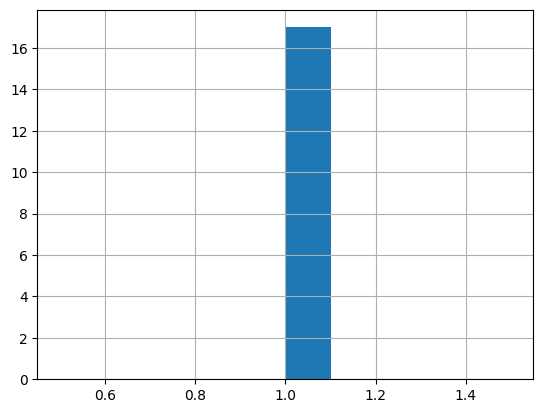

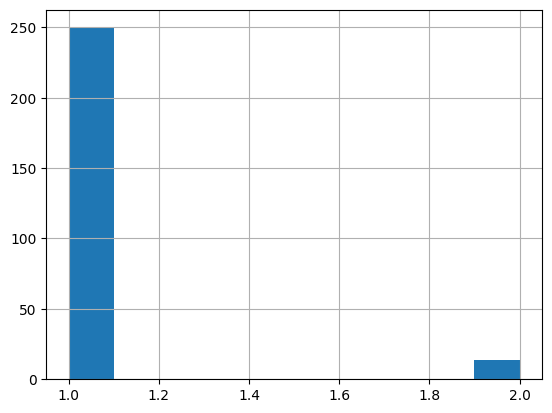

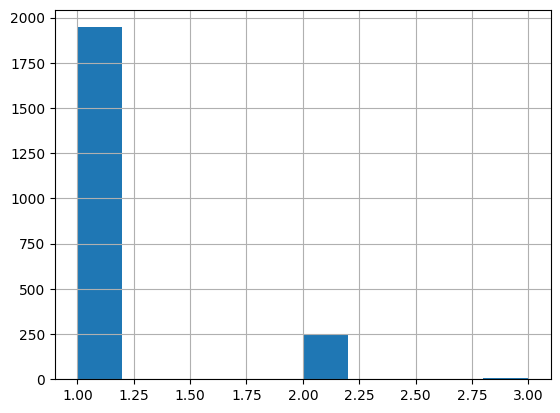

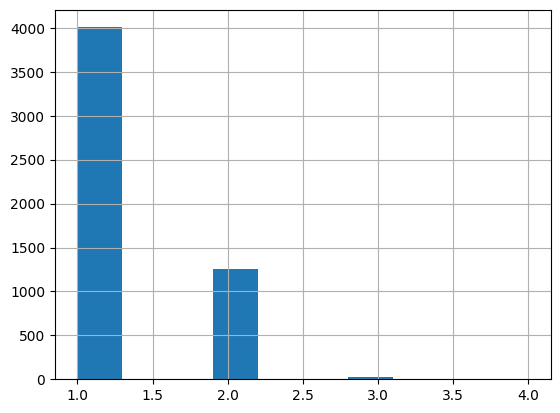

In [6]:
for i in range(1,5):
    df[df.word_length == i].most_frequent_frequency.hist()
    plt.show()

In [7]:
df[df['words'].str.startswith('anti') & ~df['words'].isna()]

,words,word_length,letter_frequencies,most_frequent_letter,most_frequent_frequency
8686,antia,5,"{'a': 2, 'n': 1, 't': 1, 'i': 1}",a,2
8687,antiabortion,12,"{'a': 2, 'n': 2, 't': 2, 'i': 2, 'b': 1, 'o': ...",a,2
8688,antiabrin,9,"{'a': 2, 'n': 2, 't': 1, 'i': 2, 'b': 1, 'r': 1}",a,2
8689,antiacademic,12,"{'a': 3, 'n': 1, 't': 1, 'i': 2, 'c': 2, 'd': ...",a,3
8690,antiadiaphorist,15,"{'a': 3, 'n': 1, 't': 2, 'i': 3, 'd': 1, 'p': ...",a,3
...,...,...,...,...,...
9707,antiwycliffist,14,"{'a': 1, 'n': 1, 't': 2, 'i': 3, 'w': 1, 'y': ...",i,3
9708,antixerophthalmic,17,"{'a': 2, 'n': 1, 't': 2, 'i': 2, 'x': 1, 'e': ...",a,2
9709,antizionism,11,"{'a': 1, 'n': 2, 't': 1, 'i': 3, 'z': 1, 'o': ...",i,3
9710,antizoea,8,"{'a': 2, 'n': 1, 't': 1, 'i': 1, 'z': 1, 'o': ...",a,2


In [8]:
df[df['words'].str.startswith('typical') & ~df['words'].isna()]

,words,word_length,letter_frequencies,most_frequent_letter,most_frequent_frequency
204316,typical,7,"{'t': 1, 'y': 1, 'p': 1, 'i': 1, 'c': 1, 'a': ...",NaN,1
204317,typically,9,"{'t': 1, 'y': 2, 'p': 1, 'i': 1, 'c': 1, 'a': ...",y,2
204318,typicalnesses,13,"{'t': 1, 'y': 1, 'p': 1, 'i': 1, 'c': 1, 'a': ...",s,3


In [9]:
df[df['words'].str.endswith('iss')& ~df['words'].isna()] # if not in shorter list try main dict and see commonalities

,words,word_length,letter_frequencies,most_frequent_letter,most_frequent_frequency
5826,alviss,6,"{'a': 1, 'l': 1, 'v': 1, 'i': 1, 's': 2}",s,2
14018,austroswiss,11,"{'a': 1, 'u': 1, 's': 4, 't': 1, 'r': 1, 'o': ...",s,4
15672,baiss,5,"{'b': 1, 'a': 1, 'i': 1, 's': 2}",s,2
18379,bekiss,6,"{'b': 1, 'e': 1, 'k': 1, 'i': 1, 's': 2}",s,2
24654,briss,5,"{'b': 1, 'r': 1, 'i': 1, 's': 2}",s,2
43282,criss,5,"{'c': 1, 'r': 1, 'i': 1, 's': 2}",s,2
47571,deepkiss,8,"{'d': 1, 'e': 2, 'p': 1, 'k': 1, 'i': 1, 's': 2}",e,2
51441,dimiss,6,"{'d': 1, 'i': 2, 'm': 1, 's': 2}",i,2
53124,diss,4,"{'d': 1, 'i': 1, 's': 2}",s,2
57351,edelweiss,9,"{'e': 3, 'd': 1, 'l': 1, 'w': 1, 'i': 1, 's': 2}",e,3


In [41]:
print(sorted([(i, len(i)) for i in common_prefixes], key = lambda x: x[1], reverse = True))

[('under', 5), ('super', 5), ('inter', 5), ('micro', 5), ('multi', 5), ('hyper', 5), ('trans', 5), ('over', 4), ('anti', 4), ('auto', 4), ('post', 4), ('semi', 4), ('mono', 4), ('poly', 4), ('self', 4), ('tele', 4), ('dis', 3), ('mis', 3), ('pre', 3), ('sub', 3), ('non', 3), ('out', 3), ('tri', 3), ('un', 2), ('re', 2), ('in', 2), ('bi', 2), ('co', 2), ('de', 2), ('ex', 2), ('un', 2)]


#Instead of just character by character maybe analyse group patterns/correlations

In [40]:
common_prefixes = [
    'un', 'dis', 're', 'in', 'mis', 'pre', 'over', 'under', 'sub', 'super', 'anti',
    'auto', 'bi', 'co', 'de', 'ex', 'inter', 'micro', 'multi', 'non', 'out', 'post',
    'semi', 'tri', 'un', 'hyper', 'mono', 'poly', 'self', 'trans', 'tele',
]
common_suffixes = [
    'ed', 'ing', 'ly', 'er', 'or', 'ion', 'ity', 'able', 'ible', 'ful', 'less',
    'like', 'ment', 'ness', 'al', 'en', 'ize', 'ise', 'ance', 'ence', 'ate', 'ify',
    'fy', 'ism', 'ist', 'ful', 'ous', 'ive', 'ic', 'ive', 'ize', 'ise', 'ism', 'ist',
]

def check_word(word):
    word = str(word)
    for prefix in common_prefixes:
        if word.startswith(prefix) and len(word) >= len(prefix) + 2:
            return True
    for suffix in common_suffixes:
        if word.endswith(suffix) and len(word) >= len(suffix) + 2:
            return True
    return False
def check_suf(word):
    word = str(word)
    for suffix in common_suffixes:
        if word.endswith(suffix) and len(word) >= len(suffix) + 2:
            return True
    return False
def check_pref(word):
    word = str(word)
    for prefix in common_prefixes:
        if word.startswith(prefix) and len(word) >= len(prefix) + 2:
            return True
    return False
df['matches_common_suffix'] = df['words'].apply(check_suf)
df['matches_common_prefix'] = df['words'].apply(check_pref)
df['matches_common_roots'] = df['words'].apply(check_word)

In [11]:
df[df.matches_common_prefix == True]

,words,word_length,letter_frequencies,most_frequent_letter,most_frequent_frequency,matches_common_suffix,matches_common_prefix,matches_common_roots
8687,antiabortion,12,"{'a': 2, 'n': 2, 't': 2, 'i': 2, 'b': 1, 'o': ...",a,2,True,True,True
8688,antiabrin,9,"{'a': 2, 'n': 2, 't': 1, 'i': 2, 'b': 1, 'r': 1}",a,2,False,True,True
8689,antiacademic,12,"{'a': 3, 'n': 1, 't': 1, 'i': 2, 'c': 2, 'd': ...",a,3,True,True,True
8690,antiadiaphorist,15,"{'a': 3, 'n': 1, 't': 2, 'i': 3, 'd': 1, 'p': ...",a,3,True,True,True
8691,antiadministration,18,"{'a': 3, 'n': 3, 't': 3, 'i': 4, 'd': 1, 'm': ...",i,4,True,True,True
...,...,...,...,...,...,...,...,...
215174,unzealousness,13,"{'u': 2, 'n': 2, 'z': 1, 'e': 2, 'a': 1, 'l': ...",s,3,True,True,True
215175,unzephyrlike,12,"{'u': 1, 'n': 1, 'z': 1, 'e': 2, 'p': 1, 'h': ...",e,2,True,True,True
215176,unzipped,8,"{'u': 1, 'n': 1, 'z': 1, 'i': 1, 'p': 2, 'e': ...",p,2,True,True,True
215177,unzips,6,"{'u': 1, 'n': 1, 'z': 1, 'i': 1, 'p': 1, 's': 1}",NaN,1,False,True,True


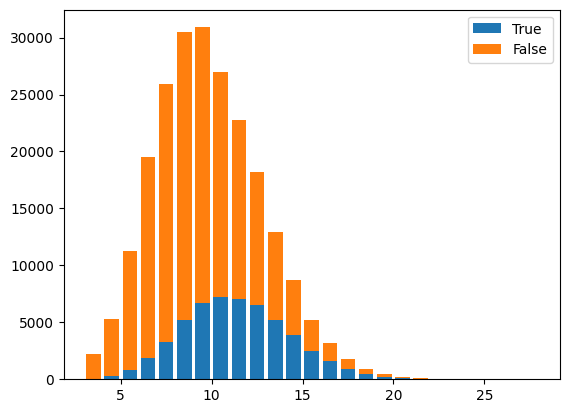

In [12]:
df_true = df[df.matches_common_prefix == True].word_length
df_false = df[df.matches_common_prefix == False].word_length
plt.hist([df_true, df_false], bins=range(3, 29), stacked=True, rwidth=0.8, label=['True', 'False'])
plt.legend(loc='upper right')

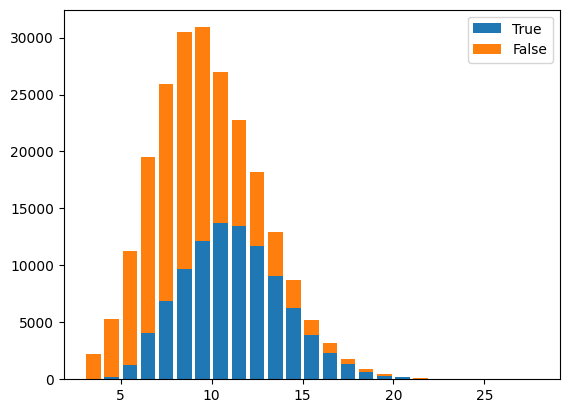

In [13]:
df_true = df[df.matches_common_suffix == True].word_length
df_false = df[df.matches_common_suffix == False].word_length
plt.hist([df_true, df_false], bins=range(3, 29), stacked=True, rwidth=0.8, label=['True', 'False'])
plt.legend(loc='upper right')

In [14]:
def guess(dict, word): # word input example: "_ p p _ e "
    ###############################################
    # Replace with your own "guess" function here #
    ###############################################

    # clean the word so that we strip away the space characters
    # replace "_" with "." as "." indicates any character in regular expressions
    clean_word = word[::2].replace("_",".")
    
    # find length of passed word
    len_word = len(clean_word)
    
    # grab current dictionary of possible words from self object, initialize new possible words dictionary to empty
    current_dictionary = dict
    new_dictionary = []
    
    # iterate through all of the words in the old plausible dictionary
    for dict_word in current_dictionary:
        # continue if the word is not of the appropriate length
        dict_word = str(dict_word)
        if len(dict_word) != len_word:
            continue
            
        # if dictionary word is a possible match then add it to the current dictionary
        if re.match(clean_word,dict_word):
            new_dictionary.append(dict_word)
    
    # overwrite old possible words dictionary with updated version
    for dict_word in current_dictionary:
        dict_word = str(dict_word)
        if new_dictionary == []:
            if re.search(clean_word, dict_word):
                new_dictionary.append(re.search(clean_word, dict_word).group())
    current_dictionary = new_dictionary
    
    # count occurrence of all characters in possible word matches
    full_dict_string = "".join(new_dictionary)

    return new_dictionary
guess(list(df.words), "_ e n a c c a n i t i c")

[]

In [15]:
from abc import ABC, abstractmethod

from collections import Counter
word_lst = [str(i) for i in list(df.words)]

def common_phrases(word_lst, k = 4):
    lst, prefix, suffix = [], [], []
    for word in word_lst:
        n = len(word)
        if k <= 0 or k > n:
            continue
        for i in range(n - k + 1):
            phrase = word[i:i + k]
            if i == 0 and n > k + 1:
                prefix.append(phrase)
            elif i == n - k and n > k + 1:
                suffix.append(phrase)
            else:
                lst.append(phrase)
    return lst, prefix, suffix

a, b, c = common_phrases(word_lst)
b_lst = [(k, v) for k, v in Counter(b).items()]
b_dict = sorted(b_lst, key=lambda x: x[1], reverse = True)

In [16]:
def get_possible_formations(word):
    p1, p2 = 0, 1
    word_lst = set()
    n = len(word)
    for j in range(n):
        if word[j] == '.':
            while p1 < j + 1:
                if p2 == n or p1 + 5 < p2:
                    p1 += 1
                    p2 = p1 + 1
                if j >= p1 and j <= p2:
                    word_lst.add(word[p1:p2+1])
                    p2 += 1
                else:
                    p2 += 1
    return word_lst

new_list = get_possible_formations('form.li.er')

def phrase_check(word, phrase):
    if re.match(phrase, word):
        return True
    return False
final = []
for i in new_list:
    temp = [(k, v * len(k)) for k, v in b_dict if phrase_check(k, i)]
    final.extend(temp)

def most_frequent_letters(tuples_list, exclude_letters):
    letter_frequencies = Counter()
    for word, value in tuples_list:
        for letter in word:
            if letter not in exclude_letters:
                letter_frequencies[letter] += value
    most_frequent_letter = letter_frequencies.most_common(1)[0][0]
    return most_frequent_letter
most_frequent_letters(final, ['f', 'o', 'r', 'm', 'l', 'i', 'e'])

'a'

In [17]:
len(final)

6528

In [18]:
df[df.words.str.endswith('appable') & ~df['words'].isna()]

,words,word_length,letter_frequencies,most_frequent_letter,most_frequent_frequency,matches_common_suffix,matches_common_prefix,matches_common_roots
68340,flappable,9,"{'f': 1, 'l': 2, 'a': 2, 'p': 2, 'b': 1, 'e': 1}",l,2,True,False,True
110032,mappable,8,"{'m': 1, 'a': 2, 'p': 2, 'b': 1, 'l': 1, 'e': 1}",a,2,True,False,True
186295,strappable,10,"{'s': 1, 't': 1, 'r': 1, 'a': 2, 'p': 2, 'b': ...",a,2,True,False,True
214273,untappable,10,"{'u': 1, 'n': 1, 't': 1, 'a': 2, 'p': 2, 'b': ...",a,2,True,True,True


In [35]:
def find_common_endings(word_list):
    endings = {}
    pattern = r'\b\w{1,9}(\w+)\b'

    for word in word_list:
        word = str(word)
        matches = re.findall(pattern, word)
        for match in matches:
            if len(match) > 1:
                if match in endings:
                    endings[match] += 1
                else:
                    endings[match] = 1

    common_endings = {ending: freq for ending, freq in endings.items() if freq > 4}

    return common_endings

def find_common_beginnings(word_list):
    beginnings = {}
    pattern = r'\b(\w+)\w{1,9}\b'  # Regex pattern to capture word beginnings

    for word in word_list:
        word = str(word)
        matches = re.findall(pattern, word)
        for match in matches:
            if len(match) > 0:  # Check if there is a match
                if match in beginnings:
                    beginnings[match] += 1
                else:
                    beginnings[match] = 1

    common_beginnings = {beginning: freq for beginning, freq in beginnings.items() if freq > 4}

    return common_beginnings
find_common_beginnings(df.words)

{'aa': 7,
 'ab': 10,
 'a': 14,
 'ac': 6,
 'ad': 9,
 'af': 8,
 'ag': 5,
 'ai': 6,
 'air': 5,
 'ak': 5,
 'alan': 5,
 'alb': 6,
 'al': 9,
 'ale': 6,
 'am': 8,
 'ami': 7,
 'an': 9,
 'ana': 6,
 'andre': 5,
 'ao': 7,
 'ap': 6,
 'ar': 14,
 'arch': 5,
 'as': 10,
 'asc': 5,
 'at': 9,
 'au': 8,
 'av': 5,
 'b': 8,
 'ba': 8,
 'ban': 5,
 'band': 6,
 'bar': 8,
 'barbe': 6,
 'barre': 5,
 'bc': 5,
 'bd': 6,
 'be': 10,
 'bea': 5,
 'bee': 7,
 'ben': 5,
 'bi': 7,
 'bl': 8,
 'bla': 5,
 'ble': 6,
 'bm': 6,
 'bo': 10,
 'bon': 8,
 'boo': 5,
 'bor': 6,
 'br': 5,
 'bra': 7,
 'brun': 5,
 'bs': 12,
 'bu': 7,
 'bur': 10,
 'ca': 11,
 'cali': 7,
 'cal': 5,
 'camp': 6,
 'candi': 5,
 'cane': 6,
 'car': 10,
 'care': 5,
 'carve': 5,
 'cas': 5,
 'cat': 5,
 'c': 11,
 'cc': 7,
 'cd': 6,
 'ce': 7,
 'centr': 5,
 'cf': 7,
 'ch': 5,
 'cha': 7,
 'char': 8,
 'charge': 5,
 'che': 6,
 'chir': 6,
 'cho': 5,
 'ci': 7,
 'clar': 5,
 'cl': 6,
 'clo': 5,
 'cm': 9,
 'coa': 5,
 'co': 6,
 'code': 7,
 'col': 7,
 'con': 8,
 'cor': 5,
 'cp':

In [43]:
from collections import defaultdict
#defunct but tried looking at roots and stuff
grouped_values = defaultdict(list)

for key, value in find_common_beginnings(df.words).items():
    key_length = len(key)
    grouped_values[key_length].append((key, value))
top_10_values1 = {}
for key_length in range(2, 6):
    values = grouped_values[key_length]
    sorted_values = sorted(values, key=lambda x: x[1], reverse=True)
    top_10_values1[key_length] = sorted_values[:10]

#buggy
for key, value in find_common_endings(df.words).items():
    key_length = len(key)
    grouped_values[key_length].append((key, value))
top_10_values2 = {}
for key_length in range(2, 6):
    values = grouped_values[key_length] 
    sorted_values = sorted(values, key=lambda x: x[1], reverse=True)
    top_10_values2[key_length] = sorted_values[:10]

{2: [('ar', 14),
  ('ha', 14),
  ('sa', 14),
  ('mo', 13),
  ('bs', 12),
  ('ja', 12),
  ('ma', 12),
  ('pa', 12),
  ('ca', 11),
  ('fa', 11)],
 3: [('bur', 10),
  ('car', 10),
  ('min', 9),
  ('pre', 9),
  ('ser', 9),
  ('spa', 9),
  ('bar', 8),
  ('bon', 8),
  ('con', 8),
  ('for', 8)],
 4: [('char', 8),
  ('cali', 7),
  ('code', 7),
  ('mari', 7),
  ('mart', 7),
  ('scra', 7),
  ('star', 7),
  ('band', 6),
  ('camp', 6),
  ('cane', 6)],
 5: [('barbe', 6),
  ('passe', 6),
  ('andre', 5),
  ('barre', 5),
  ('candi', 5),
  ('carve', 5),
  ('centr', 5),
  ('mamme', 5),
  ('resin', 5)]}

In [42]:
def get_possible_formations(word, i):
    p1, p2 = 0, 1
    word_lst = set()
    n = len(word)
    for j in range(n):
        if word[j] == '.':
            while p1 < i + 1:
                if p2 == n or p1 + 5 < p2:
                    p1 += 1
                    p2 = p1 + 1
                if i >= p1 and i <= p2:
                    word_lst.add(word[p1:p2+1])
                    p2 += 1
                else:
                    p2 += 1
    return word_lst

get_possible_formations('.il.tory', 3)

{'.il.',
 '.il.t',
 '.il.to',
 '.t',
 '.to',
 '.tor',
 '.tory',
 'il.',
 'il.t',
 'il.to',
 'il.tor',
 'l.',
 'l.t',
 'l.to',
 'l.tor',
 'l.tory'}